# Time series forecasting: Predicting stock Prices using ARIMA and GARCH Model

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\Tshepang\AppData\Local\Temp/ipykernel_13676/3268439938.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


### Loading TELSA history data 

##### variables definitions

1. __Open__: This is the price of the Stock at the opening of the trading day
2. __Close__: This is the price of the Stock at the close of the trading day
3. __High__: This is the highest price of the stock reached during the day
4. __Low__: This is the lowest price of the stock reached during the trading day
5. __adj Close__: This is the closing price of the stock adjusted for dividends and stock splits
6. __Volume__: This is the number of shares of the stock that were traded during the trading day   

In [20]:
df = pd.read_csv("TSLA.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-31,290.903320,312.663330,287.350006,312.239990,312.239990,104436000
1,2022-02-01,311.736664,314.566681,301.666656,310.416656,310.416656,73138200
2,2022-02-02,309.393341,310.500000,296.470001,301.886658,301.886658,66792900
3,2022-02-03,294.000000,312.333344,293.506653,297.046661,297.046661,78855600
4,2022-02-04,299.073334,312.166656,293.723328,307.773346,307.773346,73625400


In [21]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
247,2023-01-25,141.910004,146.410004,138.070007,144.429993,144.429993,192734300
248,2023-01-26,159.970001,161.419998,154.759995,160.270004,160.270004,234815100
249,2023-01-27,162.429993,180.679993,161.169998,177.899994,177.899994,305632100
250,2023-01-30,178.050003,179.770004,166.500000,166.660004,166.660004,230878800
251,2023-01-31,164.570007,174.300003,162.779999,173.220001,173.220001,196813541


### Questions I want to answer at the end of this project

1. What is the general trend in stock prices over time? Are they increasing,decreasing or staying the same
2. Are there any sudden spikes or dip in stock prices that might indicate significant event or market movements ?
3. What is the relationship between the volume of the shares traded and the stock price? Do high trading volumes coincide with large price movements?
4. Are there any noteble difference between the openig and closing price of the stock? Are the opening prices higher or lower than the closing prices and why might this be ?
5. Are there any correlations between the TELSA stock and other stocks, or between TELSA stock prices and broader market indices?
6. What are the summary statistics between TELSA stock price and the volume?What is the average stock price, median stock price, standard deviation, etc.?

##### Removing Duplicates but it's seems like i don't have any duplicates 

In [22]:
duplicates = df.duplicated()
df = df[~duplicates]

###### Checking if there are empty columns

In [23]:
missing_values = df.isnull().sum()
print("Missing values in each column: \n", missing_values)

Missing values in each column: 
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


###### Checking for non numerics columns

In [24]:
non_numerics_cols = df.dtypes[df.dtypes == object].index.tolist()

if len(non_numerics_cols) > 0:
    print("non_numeric_columns" , non_numerics_cols)
    
else:
    print("All columns are numeric")

non_numeric_columns ['Date']


###### converting the date column to datetime datatype for convenient and efficient us

In [25]:
df["Date"] = pd.to_datetime(df["Date"])

#set the date column as an index

df = df.set_index('Date')

###### Here i was investigating the relationship between the Opennig and close and the close of the trading day

Well i have discover that they have the same pattern and that could actually mean there wasn't too much pressure of buying and selling.This pattern means that the stock price remains relatively steady throughout the trading hours

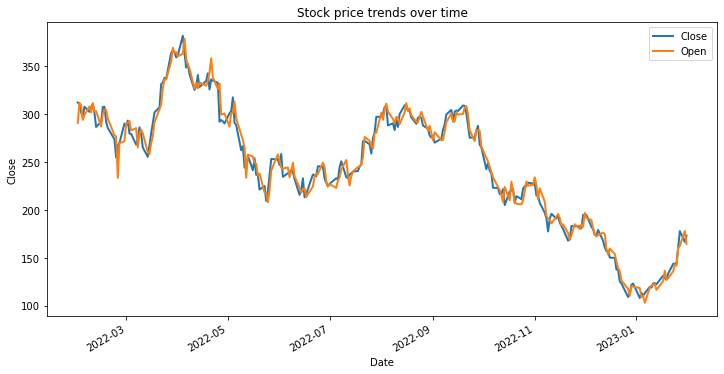

In [26]:
df[["Close","Open"]].plot(figsize=(12,6),linewidth=2.0)
plt.title("Stock price trends over time")
plt.ylabel("Close")
plt.xlabel("Date")
plt.show()

##### I have calculated the  moving averages and plot them along with the stock prices to observe  if there any sharp deviation for the moving avarage

__Moving average__ :s the average of a set of values over a certain time period, and helps to smooth out the fluctuations in the data and provide a clearer picture of the trend

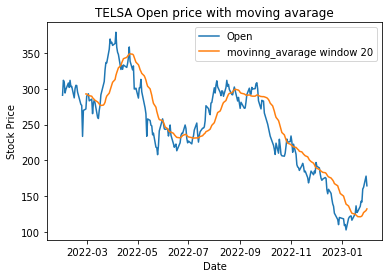

In [27]:
df["moving_avarage"] = df['Open'].rolling(window=20).mean()
plt.plot(df["Open"],label ="Open")
plt.plot(df["moving_avarage"],label="movinng_avarage window 20")
plt.title("TELSA Open price with moving avarage")
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

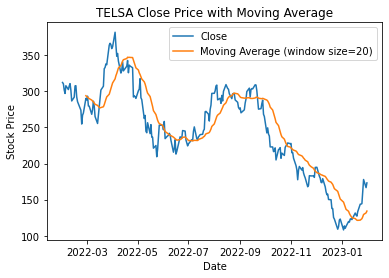

In [28]:
# calculate the moving average for a window size of 20
df['moving_average'] = df['Close'].rolling(window=20).mean()
plt.plot(df['Close'], label='Close')
plt.plot(df['moving_average'], label='Moving Average (window size=20)')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TELSA Close Price with Moving Average')
plt.show()

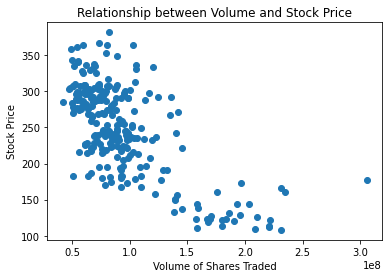

In [29]:
# Plot a scatter plot of volume and price
plt.scatter(df['Volume'], df['Close'])

# Add labels and title
plt.xlabel('Volume of Shares Traded')
plt.ylabel('Stock Price')
plt.title('Relationship between Volume and Stock Price')

# Show the plot
plt.show()


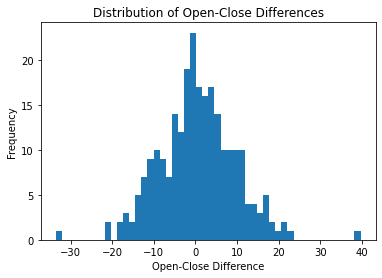

In [30]:
# Create a new column that calculates the difference between opening and closing prices
df['Open-Close Difference'] = df['Open'] - df['Close']

# Plot a histogram of the Open-Close difference
df['Open-Close Difference'].plot.hist(bins=50)

# Add labels and title
plt.xlabel('Open-Close Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Open-Close Differences')

# Show the plot
plt.show()


In [1]:
import statsmodels.api as sm
# Convert 'Date' column to DatetimeIndex
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Set frequency of DatetimeIndex to daily
df = df.asfreq('D')

df.index = pd.to_datetime(df.index)

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(df['Close'], model='multiplicative')

# Plot the results
decomposition.plot()
plt.show()


NameError: name 'pd' is not defined

In [34]:
df[['Open', 'Close', 'High', 'Low', 'Adj Close', 'Volume']].describe()

,Open,Close,High,Low,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,247.776852,247.214550,253.927672,240.908320,247.214550,9.485904e+07
std,62.848254,62.732663,63.832735,61.767233,62.732663,4.220650e+07
min,103.000000,108.099998,111.750000,101.809998,108.099998,4.186470e+07
25%,209.692493,212.637505,220.552502,205.705002,212.637505,6.702772e+07
50%,251.911667,251.758331,257.413330,242.483330,251.758331,8.411670e+07
75%,296.651672,293.966667,302.702499,288.214173,293.966667,1.025714e+08
max,378.766663,381.816681,384.290009,362.433319,381.816681,3.056321e+08
